In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data= pd.read_csv('/content/kmeans_data.txt', delim_whitespace=True, header=None)
x_d= np.array(data[0])
y_d= np.array(data[1])

In [15]:
def kernel( x, y, a, b):
  return np.exp( -0.1*(np.square(x-a) + np.square(y-b) )).reshape(-1,1)

In [4]:
def distance(a,b):
  dist = np.zeros((a.shape[0],b.shape[0]))
  for i in range(b.shape[0]):
    dist[ : , i ]= (np.square(a - b[i])).reshape(-1)
  return dist

In [5]:
def assign(points, means):
  dist= distance(points,means)
  color= np.argmin(dist,axis=1)
  return color.reshape(-1,1)

In [16]:
def mean(points, color):
  m = np.zeros((2,points.shape[1]))
  m[0]= np.mean(points[color==0],axis=0)
  m[1]= np.mean(points[color==1],axis=0)
  return m

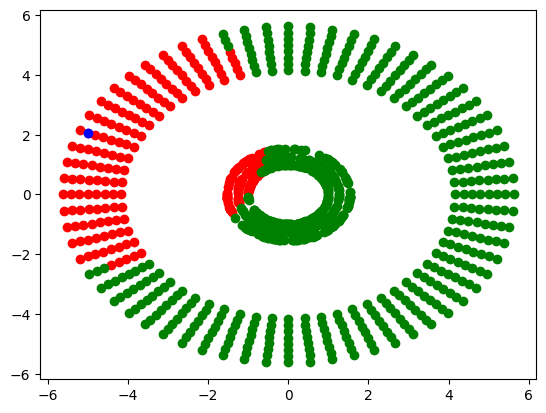

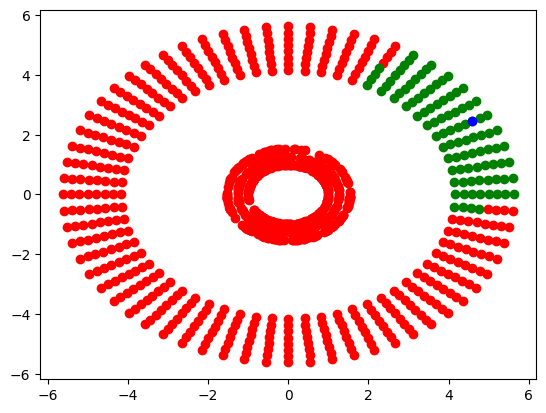

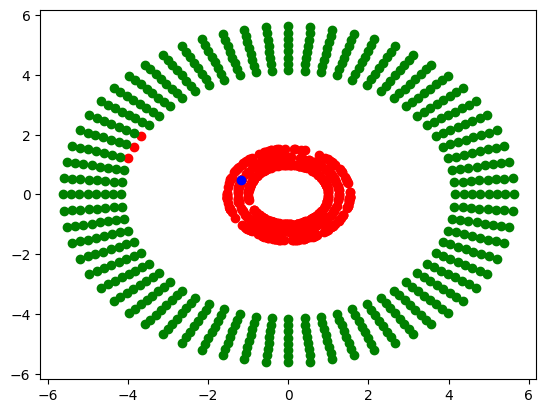

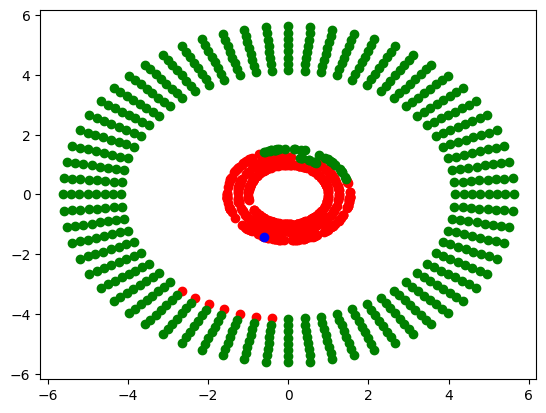

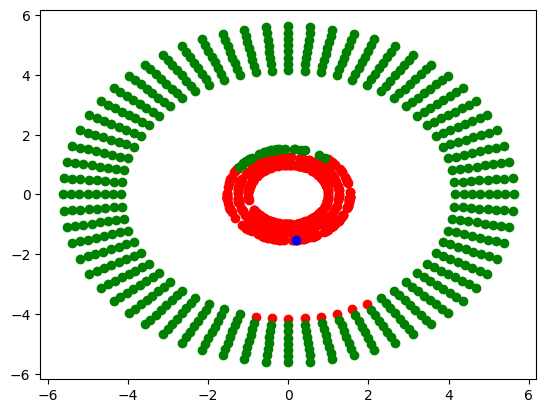

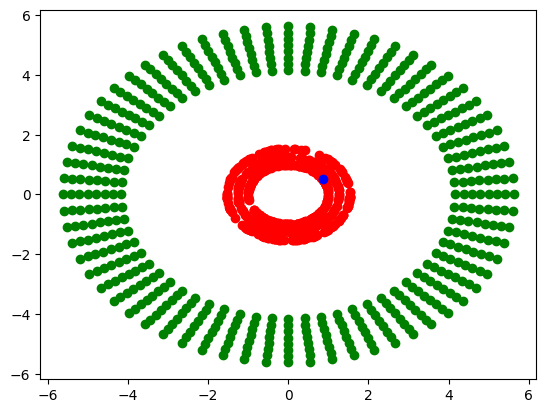

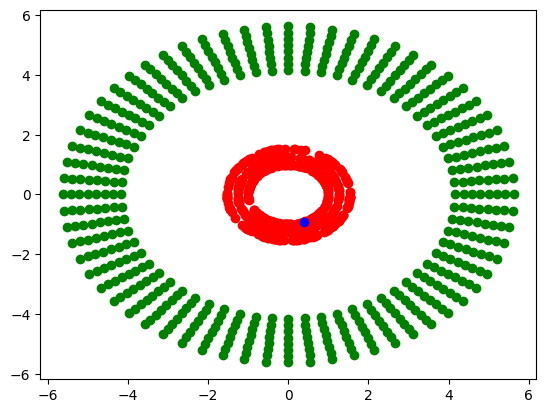

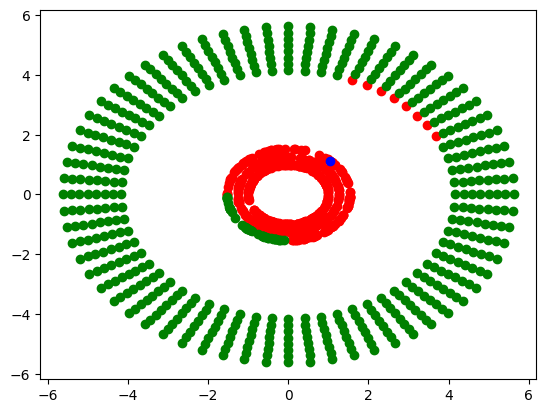

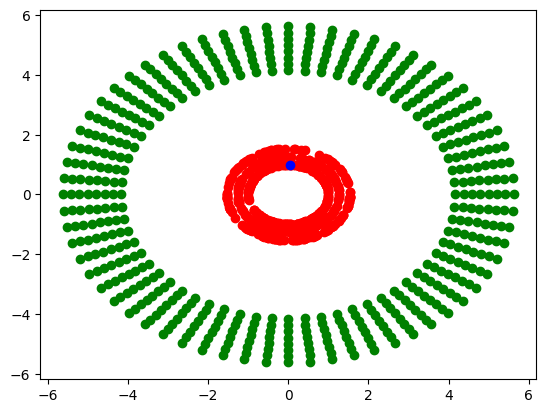

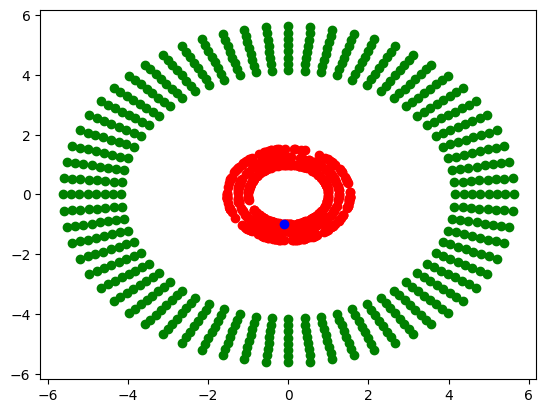

In [17]:
for i in range(10):
  p = np.random.randint(0,x_d.shape[0]-1)
  k_train = kernel(x_d,y_d,x_d[p],y_d[p])

  mean_ini = k_train[:2, :]
  color= assign(k_train,mean_ini)

  mean_ini = mean(k_train,color)
  color = assign(k_train,mean_ini)
  color=color.reshape(color.shape[0])

  plt.scatter(x_d[color==0],y_d[color==0], c='r')
  plt.scatter(x_d[color==1],y_d[color==1], c='g')
  plt.scatter(x_d[p],y_d[p],c='b')
  plt.show()